<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#L'analyse-des-données" data-toc-modified-id="L'analyse-des-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>L'analyse des données</a></span></li><li><span><a href="#Préparation-des-données" data-toc-modified-id="Préparation-des-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Préparation des données</a></span></li></ul></div>

# TP Travail Préparatoire Inter-Promo

Nous allons dans ce TP introduire certaines notions de Machine Learning qui vous seront utiles durant le projet Inter-Promotion 2021. Avant de démarrer il est important de noter qu'il existe 3 cadres dans lesquelles nous pouvons démarrer un projet de Machine Learning.
- Le cadre **Supervisé :** Dans ce cadre nous allons chercher, à l'aide d'algorithmes statistiques, à prédire une variable cible dans un jeu de données, à partir de variables descriptives (Par exemple : essayer de prédire le prix d'une maison à partir de sa superficie, du nombre d'étages qu'elle posséde, de la taille de son garage, etc). Et pour se faire nous allons faire "apprendre" à notre modèles à deviner le prix des maisons en lui fournissant beaucoup d'exemples de descriptif de maison et le prix correspondant à ces descriptifs. 
- Le cadre **Non-Supervisé** : Dans ce cadre nous allons chercher, à l'aide d'algorithmes statistiques, à prédire une variable cible dans un jeu de données, à partir de variables descriptives (Par exemple : essayer de prédire si une personne présente sur le Titanic va survivre à partir de sa classe sur le Titanic, le prix de son billet, etc). Là ou le cadre Non-Supervisé diffère du cadre supervisé c'est que dans le cadre Non Supervisé pour faire "apprendre" notre modèle nous allons seulement utiliser le descriptif des passagers du Titanic (les variables descriptives) et non leurs descriptifs (les variables descriptives) ET le fait qu'il survive ou non (variables cibles).
- Le cadre de **Clustering** : Dans ce cadre nous simplement chercher à classer par groupes les lignes de notre jeu de données à partir de leurs descriptifs (les variables descriptives, Par exemple : essayer de regrouper différents textes par thème en fonction de leurs descriptifs). 

Nous allons un des exemples de chacun de ces cadres.

# Présentation des différentes librairies utilisées

![Pandas](img/pandas_logo.png) 

**Pandas** est une bibliothèque écrite pour le langage de programmation Python permettant la manipulation et l'analyse des données. Elle propose en particulier des structures de données et des opérations de manipulation de tableaux numériques et de séries temporelles. 

- l'objet DataFrame pour manipuler des données aisément et efficacement avec des index pouvant être des chaines de caractères ;
- des outils pour lire et écrire des données structurées en mémoire depuis et vers différents formats : fichiers CSV, fichiers textuels, fichier du tableur Microsoft Excel, base de données SQL ou le format rapide et permettant de gérer de gros volume de données nommé HDF5 ;
- alignement intelligent des données et gestion des données manquantes (NaN = not a number). alignement des données basé sur des étiquettes (chaines de caractères). tri selon divers critères de données totalement désordonnées ;
- Redimensionnement et table pivot ou pivot table en anglais (aussi nommé tableau croisé dynamique) ;
- Fusion et jointure de large volume de données
- Analyse de séries temporelles


Lien de la documentation : https://pandas.pydata.org/pandas-docs/stable/

_______
![Numpy](img/numpy_logo.png) 

**NumPy** est une extension du langage de programmation Python, destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux.
Elle propose des types et des opérations beaucoup plus performants que ceux de la lib standard, et possède des raccourcis pour les traitements de masse.

Lien de la documentation : https://docs.scipy.org/doc/
____

![Matplotlib](img/plt_logo.png) 

**Matplotlib** est une bibliothèque du langage de programmation Python destinée à tracer et visualiser des données sous forme de graphiques. Elle peut être combinée avec les bibliothèques python de calcul scientifique NumPy et SciPy.

Lien de la documentation : https://matplotlib.org/contents.html


____

![Sklogo](img/sk_logo.png)

**Scikit-learn** est une bibliothèque libre Python dédiée à l'apprentissage automatique. Elle est développée par de nombreux contributeurs notamment dans le monde académique par des instituts français d'enseignement supérieur et de recherche comme Inria et Télécom ParisTech. Elle comprend notamment des fonctions pour estimer des forêts aléatoires, des régressions logistiques, des algorithmes de classification, et les machines à vecteurs de support. Elle est conçue pour s'harmoniser avec d'autres bibliothèques libres Python, notamment NumPy et SciPy.

Lien de la documentation : http://scikit-learn.org/stable/

# Le cadre supervisé

Nous allons commencer par voir un exemple de problème supervisé. Pour cet exemple nous allons utiliser le jeu de données Boston House. Avec ce jeu de données nous allons essayer de prédire le prix de certaines maisons de Boston en fonction du descriptif de la maison (sa superficie, son nombre de pièces, etc).

## L'analyse des données

La première étape dans ce type de projet est d'analyser les données. Afin d'observer la distribution de données et remarquer si nous disposons de certaines lignes données avec des valeurs extrêmes.

In [1]:
# Liste des imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Une couche supplémentaire à matplotlib

In [2]:
data = pd.read_csv('data/train.csv')  # import des données dans un DataFrame

In [3]:
# Regardons les nom des colonnes
print("Liste des colonnes présentes dans le jeu de données : ")
data.columns

Liste des colonnes présentes dans le jeu de données : 


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# Bref descriptif de la variable cible (le prix des maisons)
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\alice\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


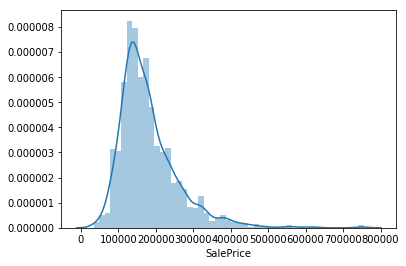

In [5]:
# Histogramme et courbe de distribution de la variable cible
sns.distplot(data['SalePrice'])

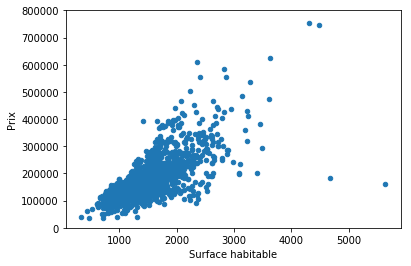

In [6]:
# Représentation du prix en fonction d'une variable quantitative, ici la surface habitable
var = 'GrLivArea'

# On créé un tableau avec deux colonnes, une avec le prix et une avec la surface habitable
price_surface = pd.concat([data['SalePrice'], data[var]], axis=1)
price_surface.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))
plt.ylabel("Prix")
plt.xlabel("Surface habitable")
plt.show()

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

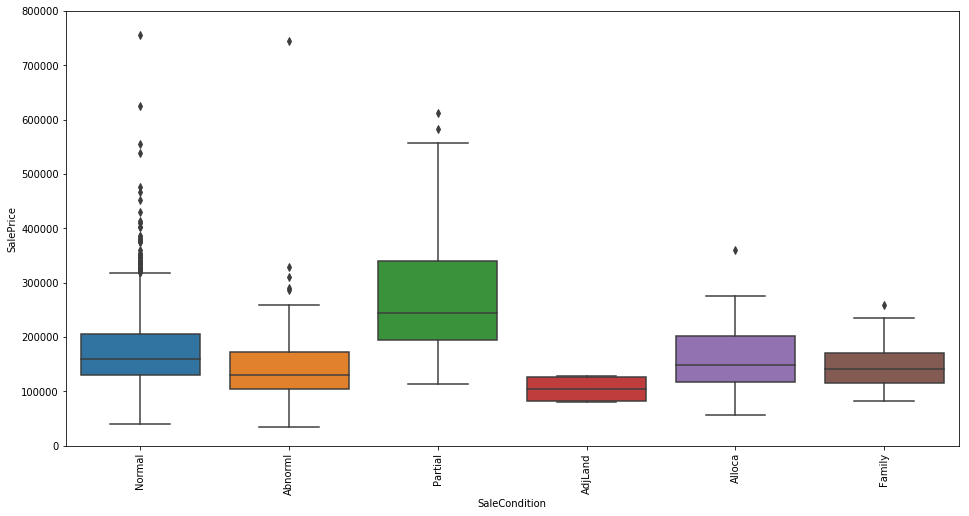

In [7]:
# Représentation du prix en fonction d'une variable qualitative
var = 'SaleCondition'
pair = pd.concat([data['SalePrice'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=pair)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

## Préparation des données

Nous ne pouvons pas donner à la plupart des algorithmes de Machine Learning des données manquantes (NaN), l'un des premiers défis que vous devrez réussir est de gérer ces variables manquantes en les remplaçants par des estimations.

In [8]:
# Missing data
# La méthode isnull sort une matrice du meme format que train et pour chaque element de cette matrice
# Envoie un booleen : True si la valeur est une valeur manquante (NaN), False sinon
# Puis nous sommons le nombre de valeurs null
total = data.isnull().sum().sort_values(ascending=False)

# On regarde le pourcentage de valeurs manquantes pour chaque variable
percent = (data.isnull().sum()/data.isnull().count()
           ).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000

Pour remplacer les valeurs manquantes nous allons utiliser la méthode fillna() de pandas qui remplace toutes les valeurs manquantes d'un DataFrame par la valeur que l'on va lui passer en paramètre.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [9]:
# axis = 1 signifie que l'on va faire la modification sur toutes les colonnes
data.fillna(0, axis=1, inplace=True)
# inplace = True signifie que l'on va faire la modification directement dans le dataframe.

Il faut donner du sens à vos variables qualitatives, en effet les algorithmes de machine learning ne prennent pas les variables qualitatives en entrée, il leur faut des valeurs numériques.
Pour remédier à cela il y a plusieurs méthodes :
 - **Label encoding** (par exemple, remplacer les valeurs [droite, gauche, marcheurs] par [0, 1, 2])
 - **One Hot encoding**(par exemple, remplacer les valeurs [droite, gauche, marcheurs] par 3 variables binaires)
 
Ressources : 
 - Méthode Sklearn pour le label encoding : http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
 - Méthode Pandas pour le one hot encoding : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
 
Nous nous allons utiliser le One Hot Encoding.

In [10]:
# La fonction get_dummies est la fonction pandas qui applique le One Hot Encoding
data = pd.get_dummies(data)

# L'apprentissage et la Validation du modèle

Une fois notre préparation terminée nous allons faire apprendre à notre modèle statistique les "pattern" des données. Mais une fois notre modèle entraîné nous allons aussi test les performances de notre modèle sur une seconde partie de notre jeu de données afin de savoir si notre modèle prédit bien ou mal le prix des maisons.

In [11]:
# Notre fonction d'erreur
def rmse(predictions:list, targets:list)->float:
    """Documentation
    Parametres:
      predictions (array): Predicted value
      targets (array): True value

    Out:
      RMSE score (float): the score
    """
    return np.sqrt(np.mean((predictions-targets)**2))

In [12]:
# On divise notre jeu de données en 2 sous jeu de données
# Le train pour entraîner (faire apprendre) notre modèle
# Le test pour tester notre modèle
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(
    ['SalePrice', 'Id'], axis=1), data['SalePrice'], test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
# Nous définissons notre modèle, ici une simple régression linéaire
model = LinearRegression()

In [14]:
# Ici nous allons entraîner notre modèle
model.fit(X_train, y_train)  # La fonction .fit permet d'entraîner notre modèle
# Et maintenant nous allons calculer l'erreur de notre modèle
# La fonction predict permet de prédire sur le jeu de test
print(rmse(model.predict(X_test), y_test))

65340.0211125512


On obtient une erreur de 65340, ce qui signifie qu'en moyenne quand notre modèle prédit le prix d'une maison il se trompe de 65340 dollars. 

# Le cadre Non Supervisé

Nous allons maintenant voir un exemple de problème Non-Supervisé. Dans ce type de problème on cherche le plus souvent à détecter des individus anormaux. C'est qu'on appelle de la détection d'outliers. Comme expliquer dans l'introduction avec ce type de problème on de dispose bien souvent pas de la variable cible, nous allons donc devoir entraîner un modèle sans variable cible et seulement avec les variables descriptives.

Nous allons ici utiliser des données qui sont des données de serveur, et notre objectif est de détecter si certaines des lignes de ces données sont des attaques sur serveur ou non.

In [15]:
# Téléchargement du DataSet
KDD = np.loadtxt(
    'http://www.math.univ-toulouse.fr/~epauwels/LearningM2SID/KDDNetworkIntrusion.txt', delimiter=',')

# Variables descriptives ( durée de la connexion, nb de bytes envoyés, nb de bytes reçu)
X = KDD[:, (0, 1, 2)]
# Attaque ou non
y = KDD[:, 3]

Ici nous procédons à une rapide analyse des données

Text(0.5, 1.0, 'Boxplot des variables descriptives ')

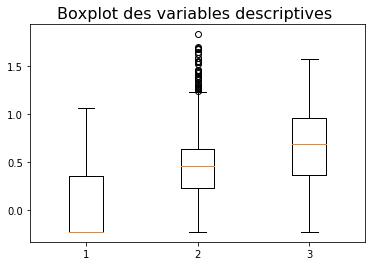

In [16]:
plt.boxplot(X)
plt.title('Boxplot des variables descriptives ', fontsize=16)

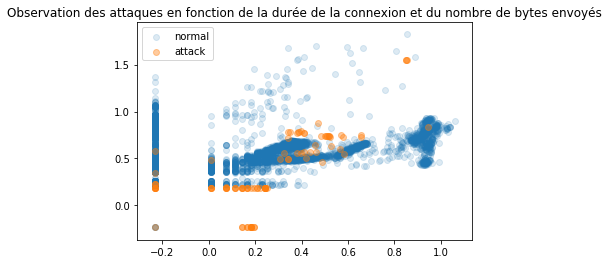

In [17]:
plt.title('Observation des attaques en fonction de la durée de la connexion et du nombre de bytes envoyés')
plt.scatter(X[y == 0, 0], X[y == 0, 1], alpha=0.15, label='normal')
plt.scatter(X[y == 1, 0], X[y == 1, 1], alpha=0.4, label='attack')
plt.legend()

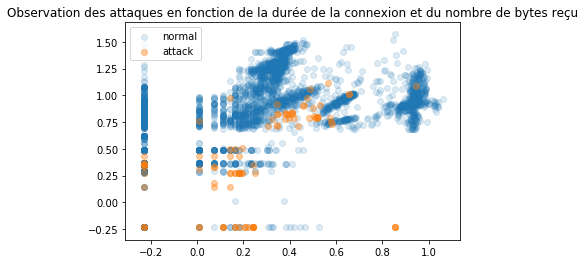

In [18]:
plt.title('Observation des attaques en fonction de la durée de la connexion et du nombre de bytes reçu')
plt.scatter(X[y == 0, 0], X[y == 0, 2], alpha=0.15, label='normal')
plt.scatter(X[y == 1, 0], X[y == 1, 2], alpha=0.4, label='attack')
plt.legend()

Ici nous n'avons pas de valeurs manquantes et pas de variables qualitatives donc aucune étape de préparation de données n'est nécessaire. Nous passons donc directement à l'entraînement du modèle. De plus il faut noter que comme nous sommes dans un cas non-supervisé (et donc nous n'utilisons pas notre variable cible pour l'entraînement) nous pouvons entraîner notre modèle sur toutes les données.

In [19]:
from sklearn.neighbors import LocalOutlierFactor
model = LocalOutlierFactor(n_neighbors=2, contamination=0.02)

In [20]:
# La fonction fit_predict qui n'est pas présente sur tous les modèles permet d'entraîner
prediction = model.fit_predict(X)
# et de fournir la prédiction en même temps

Cette fois-ci nous allons utiliser comme métrique, pour calculer les performances de notre modèle, l'accuracy. L'accuracy représente le pourcentage de données bien prédit.

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(pd.Series(prediction).replace([-1], [0]), y)

0.032434277910549675

Ici on a une accuracy de 3% ce qui signifie que notre modèle détecte très mal les attaques.

# Le cadre de Clustering

Pour le clustering nous allons chercher à regrouper les individus présents dans le jeu de données entre eux afin de former des groupes. Encore une fois seul les variables descriptives vont être utilisées.

Le jeu de données que nous allons utiliser cette fois est le jeu de données Iris qui regroupe des mesures effectuées sur 3 types de fleurs différentes. L'objectif va être, à partir de ces descriptifs de fleur, retrouver leurs types.

In [22]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :4]
y = iris.target

Encore une fois nous procédons à une rapide analyse des variables descriptive.

Text(0.5, 1.0, 'Boxplot des variables descriptives ')

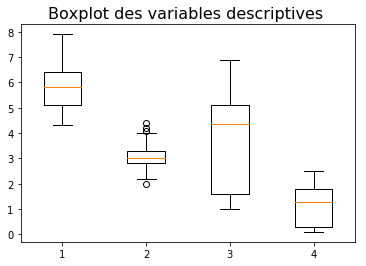

In [23]:
plt.boxplot(X)
plt.title('Boxplot des variables descriptives ', fontsize=16)

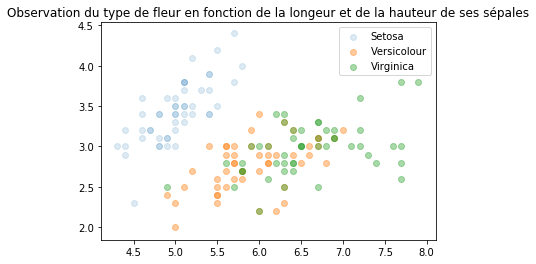

In [24]:
plt.title('Observation du type de fleur en fonction de la longeur et de la hauteur de ses sépales')
plt.scatter(X[y == 0, 0], X[y == 0, 1], alpha=0.15, label='Setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], alpha=0.4, label='Versicolour')
plt.scatter(X[y == 2, 0], X[y == 2, 1], alpha=0.4, label='Virginica')
plt.legend()

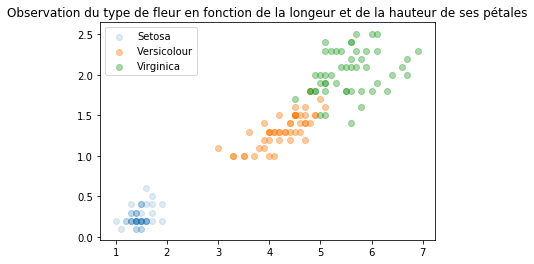

In [25]:
plt.title('Observation du type de fleur en fonction de la longeur et de la hauteur de ses pétales')
plt.scatter(X[y == 0, 2], X[y == 0, 3], alpha=0.15, label='Setosa')
plt.scatter(X[y == 1, 2], X[y == 1, 3], alpha=0.4, label='Versicolour')
plt.scatter(X[y == 2, 2], X[y == 2, 3], alpha=0.4, label='Virginica')
plt.legend()

Ici en observant les données il est assez facile de remarquer que les types de fleurs vont probablement être facilement distingué par le modèle.

Encore une fois pas de préparation de données car pas de valeurs manquantes et pas de variables qualitatives. Nous passons donc directement à l'entraînement du modèle. De plus comme nous n'utilisons toujours pas la variable cible nous pouvons entraîner le modèle sur toutes les données.

In [26]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42)

In [27]:
prediction = model.fit_predict(X)

Nous allons encore une fois utiliser comme métrique pour évaluer notre modèle l'accuracy.

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(pd.Series(prediction).replace([0, 1, 2], [1, 0, 2]), y)

0.8933333333333333

Cette fois nous obtenons une accuracy de 89% ce qui signifie que 89% des prédictions que notre modèle fait sont bonnes.